In [1]:
import numpy as np 
import pickle 
import os 
import re 
import time as tm
import pandas
from collections import Counter

In [2]:
def save_obj(obj, filename): 
    with open('data/' + filename + '.pkl', 'wb+') as f: 
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
def load_obj(filename): 
    with open('data/' + filename + '.pkl', 'rb') as f: 
        return pickle.load(f)

In [3]:
class hangman: 
    
    # Constructor 
    # Instance variables = [word, length, regex pattern, dictionary of characters, 
    #                       list of characters, number of wrong guesses]
    def __init__(self, word): 
        self.word = word # secret word 
        self.length = len(word) #length of word 
        self.pattern = r'^(.{' + re.escape(str(self.length)) + '})$' # regex pattern of game
        self.charDict = {} # dictionary of all attempted characters
        self.charList = [] # list of successful characters 
        for x in range(self.length):
            self.charList.append('.') 
        self.wrong_guesses = 0 # number of wrong guesses 
        self.correct = 0 
    
    # attempt a character 
    # increment wrong guess by 1 if incorrect 
    # do not let the same letter be tried twice 
    # returns boolean if char is present/absent 
    def attempt(self, char): 
        x = self.charDict.get(char, 0)
        if x == 0: 
            self.charDict[char] = True 
            indexList = self.find(char)
            self.correct += len(indexList)
            if len(indexList) == 0: 
                self.wrong_guesses += 1 
                # print('bad guess')
            for index in indexList:
                self.charList[index] = self.word[index]
            self.pattern = self.arrToRegex(self.charList)
            return len(indexList) != 0  

        else:
            print("you've already tried this letter")
    
    
    # find the indices at which character ch appears 
    def find(self, ch):
        return [i for i, ltr in enumerate(self.word) if ltr == ch]

    # convert a list of characters to regex 
    def arrToRegex(self, list_of_characters):
        reg = r'^('
        for item in list_of_characters: 
            reg = reg + item 
        reg = reg + ')$' 
        return reg 
            
    # return the regex pattern 
    def regex(self): 
        return self.pattern
    
    # remove all words that do not have a particular character 
    def remove(self, list_of_words, char):
        list_of_matches = []
        pattern = r'(.*' + char + '.*)'
        for item in list_of_words:
            x = re.match(pattern, item)
            if x == None:
                list_of_matches.append(item)
        return list_of_matches

    # return all regex matches from a list of words 
    def match(self, list_of_words, pattern):
        list_of_matches = []
        for item in list_of_words: 
            x = re.search(pattern, item)
            if x != None:
                list_of_matches.append(item)
        return list_of_matches 

    # frequency of characters given a list of words 
    def charFrequency(self, list_of_words): 
        dict_of_characters = {}
        for item in list_of_words: 
            arr_char = list(item)
            for x in arr_char: 
                dict_of_characters[x] = dict_of_characters.get(x, 0) + 1
        return dict_of_characters 

    # guess the next words 
    def greedy_guess(self, list_of_words):
        freq_char = self.charFrequency(list_of_words)
        temp_freq_char = self.charFrequency(list_of_words)
        for item in temp_freq_char:
            x = self.charDict.get(item, 0)
            if x != 0: 
                del freq_char[item]
        freq_char_keys = list(freq_char.keys())
        freq_char_values = list(freq_char.values())
        maxIndex = np.where(freq_char_values == np.amax(freq_char_values))[0]
        return freq_char_keys[np.random.choice(maxIndex)]
    
    def charSet(self, list_of_words):
        dict_of_characters = {}
        for item in list_of_words:
            arr_char = dict(zip(list(item), list(item))).keys()
            for x in arr_char:
                dict_of_characters[x] = dict_of_characters.get(x, 0) + 1
        return dict_of_characters 
    
    # guess the next words 
    def greedy_set(self, list_of_words):
        freq_char = self.charSet(list_of_words)
        temp_freq_char = self.charSet(list_of_words)
        for item in temp_freq_char:
            x = self.charDict.get(item, 0)
            if x != 0: 
                del freq_char[item]
        freq_char_keys = list(freq_char.keys())
        freq_char_values = list(freq_char.values())
        maxIndex = np.where(freq_char_values == np.amax(freq_char_values))[0]
        return freq_char_keys[maxIndex[0]]
    
    def game(self):
        word = self.word
        low = length_word[len(word)]
        while self.correct != len(word): 
            a = self.greedy_guess(low)
            if (self.attempt(a)): 
                low = self.match(low, self.regex())
        
    def game_set(self):
        word = self.word
        low = length_word[len(word)]
        while self.correct != len(word): 
            a = self.greedy_set(low)
            if (self.attempt(a)): 
                low = self.match(low, self.regex())

In [4]:
english_words = load_obj('english_words')
word_length = load_obj('word_length_english')
length_word = load_obj('length_word_english')

In [6]:
# returns N random words from dictionary 
def randomWord(N): 
    return [english_words[i] for i in np.random.choice(len(english_words), N)]
    

In [13]:
# sort dictionary by keys
# keys are assumed to be real numbers 
def sort_dict(mydict1): 
    x = list(mydict1.keys())
    y = np.argsort(x)
    x = np.sort(x)
    z = list(mydict1.values())
    k = []
    for i in range(len(z)): 
        k.append(z[i])
    mydict2 = dict(zip(x, k))
    return mydict2
    

In [14]:
def plot_frequency(a):
    letter_counts = Counter(a)
    letter_counts = sort_dict(letter_counts)
    df = pandas.DataFrame.from_dict(letter_counts, orient='index')
    df.plot(kind='bar')

In [8]:
# # create a dataset of 10k words 
# words = randomWord(10000)
# save_obj(words, '10k_words')

In [10]:
words = load_obj('10k_words')

In [53]:
# test the greedy heuristic 
# 2105.54 seconds 
timeline = tm.time()
wrong_guesses = []
for item in words: 
    h1 = hangman(item)
    h1.game()
    wrong_guesses.append(h1.wrong_guesses)

print(tm.time() - timeline)
save_obj(wrong_guesses, '10k_greedy_stats')

2105.5402266979218


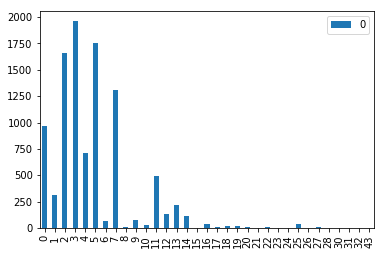

In [79]:
plot_frequency(wrong_guesses)

In [11]:
# test the greedy no repetition heuristic  
timeline = tm.time()
wrong_guesses = []
words = words[:100]
for item in words: 
    h1 = hangman(item)
    h1.game_set()
    wrong_guesses.append(h1.wrong_guesses)

print(tm.time() - timeline)
save_obj(wrong_guesses, '10k_greedy_set_stats')

30.04378628730774


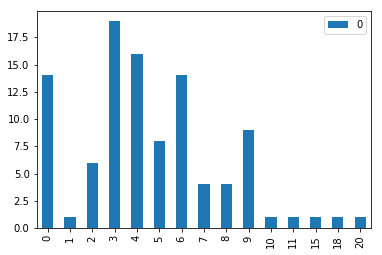

In [16]:
plot_frequency(wrong_guesses)